# Binary Cross Entropy Loss 
This notebook aims to help gain a better understanding of the binary cross entropy loss by computing the likelihood function and the negative log likelihood functoin with the Bernoulli Distribution as the chosen parametric distribution, whose outputs are passed through a logistic sigmoid function 

**<ins>Note</ins>**: Review loss_functions.ipynb before to understand the likelihood and the negative log likelihood functions/equation format

## Definition of a Binary Cross Entropy Loss 
Binary cross entropy loss functions are used as loss functions in neural network models that assign an input value to one of two discrete output values (0, 1). This can be thought of as a model that outputs either a true or false. 

The binary cross entropy loss function for each data point is defined as: 
$$
L = - \big( y \log(p) + (1 - y) \log(1 - p) \big)
$$

where:  
- $y$ — the **true label**  
- $p$ — predicted probability that the input belongs to class 1  
- $1 - p$ — predicted probability that the input belongs to class 0  

### Imports 
Import the libraries needed to define, compute, and plot the likelihood, negative log likelihood, and the sigmoid function along with the Bernouli Distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Rectified Linear Unit (ReLU) Function

In [10]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Define a Shallow Neural Network

In [11]:
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Ensure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # Compute the hidden unit using matrix multiplication for the input array
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))

    # Compute the output of the shallow neural network using matrix multiplication for the input array
    model_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return model_out

### Define Parameter Function 
Define a function to automatically define values to each parameter

In [12]:
def get_parameters():
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.6
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0

  return beta_0, omega_0, beta_1, omega_1

### Define Plotting Function

In [13]:
def plot_binary_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Format the model data to 1D arrays
  x_model = np.squeeze(x_model)
  out_model = np.squeeze(out_model)
  lambda_model = np.squeeze(lambda_model)

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model)
  ax[0].set_xlabel(r'Input, x'); ax[0].set_ylabel(r'Model output')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model)
  ax[1].set_xlabel(r'Input, x'); ax[1].set_ylabel(r'lambda or Pr(y=1|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    ax[1].plot(x_data, y_data, 'ko')
  plt.show()

## Definition of a Sigmoid Function
A sigmiod function is a function that maps any value from negative infinity to positive infinity to either 0 or 1. The input of the Bernoulli distribution is usually first passed through a sigmoid function because the Bernoulli distribution only takes input values in the range of 0 and 1. 

The sigmoid function for each data point is defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Where:  
- $x$ — input (logit)  
- $\sigma(x)$ — output probability, $0 < \sigma(x) < 1$

### Define a Sigmoid Function

In [14]:
def sigmoid(model_out):
  sig_model_out = 1 / (1 + np.exp(-model_out))

  return sig_model_out

### Define Training Data 
Define input/output pairs of 1D training data

In [15]:
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([0,1,1,0,0,1,\
                    1,0,0,1,0,1,\
                    0,1,1,0,1,0, \
                    1,1])

### Define Parameters

In [16]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Define Input Values 
Define an input value (x_model) as an array of numbers from 0 to 1 with increments of 0.01 between each value

In [17]:
x_model = np.arange(0,1,0.01)

### Compute the shallow neural network

In [18]:
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the sigmoid function 
Use the output of the shallow neural network as input for the sigmoid function and store the resulting output in lambda_model

In [19]:
lambda_model = sigmoid(model_out)

### Plot the shallow neural network
Plot the shallow neural network before it was passed through the sigmoid function (left) and after it was passed through the sigmoid functoin (right)

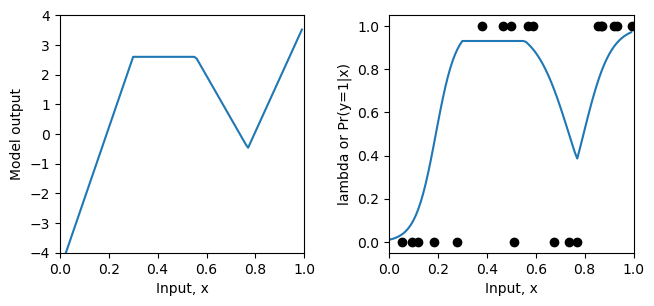

In [20]:
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)

## Definition of a Bernoulli Distribution
A bernoulli distribution is a type of parametric probability distribution which describes a random variable as a probability of each of the two output values

### Define a Bernoulli Distribution
Define a parametric probability distribution that returns the probability of each of the two output values given an input value

In [28]:
def bernoulli_distribution(y, lambda_param):
    prob = np.power(1-lambda_param, 1-y)*lambda_param**y

    return prob

## Likelihood Function 
$$
\prod_{i=1}^{n} Pr(y_i \mid f(x; \phi)
$$

### Define a Likelihood Function (Bernoulli Distribution) 
Define a likelihood function for the Bernoulli Distribution

In [29]:
def compute_likelihood(y_train, lambda_param):
  likelihood = np.prod(np.power(1-lambda_param, 1-y_train)*lambda_param**y_train)

  return likelihood

### Define Parameters

In [30]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Compute the shallow neural network 
Compute the shallow neural network, outputting the probabilities of each of the two output values for every single input value

In [32]:
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the sigmoid function

In [33]:
lambda_train = sigmoid(model_out)

### Compute the likelihood function 
Compute the likelihood function by using the output of the sigmoid function

In [34]:
likelihood = compute_likelihood(y_train, lambda_train)

## Negative Log Likelihood Function
$$
\Big( - \sum_{i=1}^{n} \log Pr(y_i \mid f(x_i; \theta) \Big)
$$

### Define a Negative Log Likelihood Functoin (Bernoulli Distribution)

In [35]:
def compute_negative_log_likelihood(y_train, lambda_param):
  nll = -np.sum(np.log(np.power(1-lambda_param, 1-y_train)*lambda_param**y_train))

  return nll

### Define Parameters

In [36]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Compute the shallow neural network 
Compute the shallow neural network, outputting the probabilities of each of the two output values for every single input value

In [37]:
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the sigmoid function

In [38]:
lambda_train = sigmoid(model_out)

### Compute the negative log likelihood function
Compute the negative log likelihood function by using the output of the sigmoid function

In [39]:
nll = compute_negative_log_likelihood(y_train, lambda_train)

## Minimize the Loss Function (beta_1) 
Using the defined likelihood and negative log likelihood function, optimize beta_1 to minimize the loss function

### Define Parameters 
Define beta_1 as an array of input values from -2 to 6 with increments of 0.1 between each value. Define all the other parameters to be constants

In [42]:
beta_1_vals = np.arange(-2,6.0,0.1)
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Define Array Structure 
Define an array structure of 0s for the likelihood and negative log likelihood function

In [43]:
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

### Compute the functions and plot the shallow neural network 
Compute the likelihood and negative log likelihood function for each beta_1 value in the defined array. Plot the shallow neural network for every 20th beta_1 value

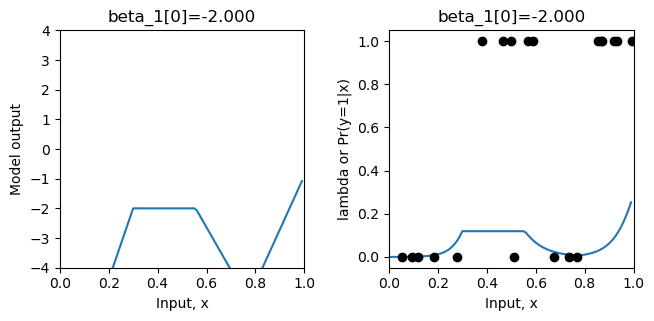

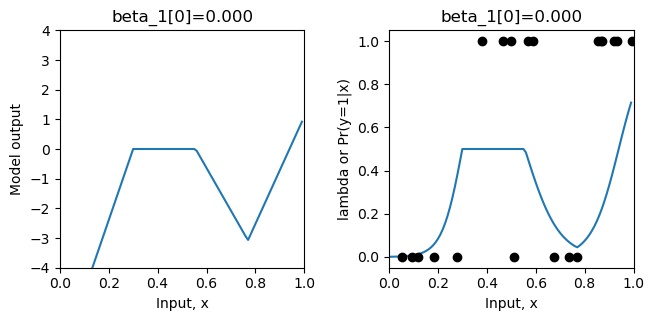

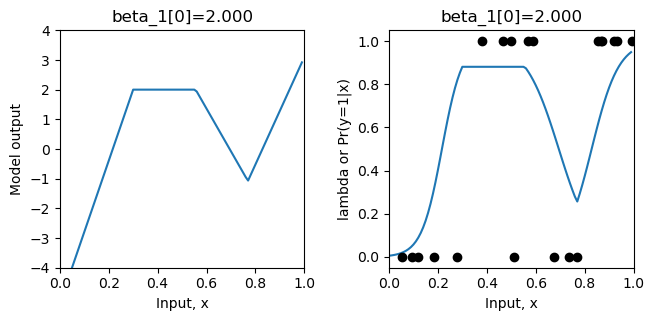

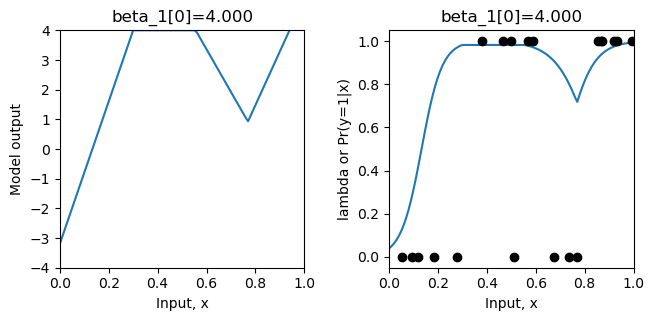

In [44]:
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]

  # Compute the network with the new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = sigmoid(model_out)

  # Compute and store the likelihood and the negative log likelihood
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)

  # Plot the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = sigmoid(model_out)
    plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))

### Plot the likelihood and negative log likelihood
Plot the output of the likelihood and the negative log likelihood function for each beta_1 value

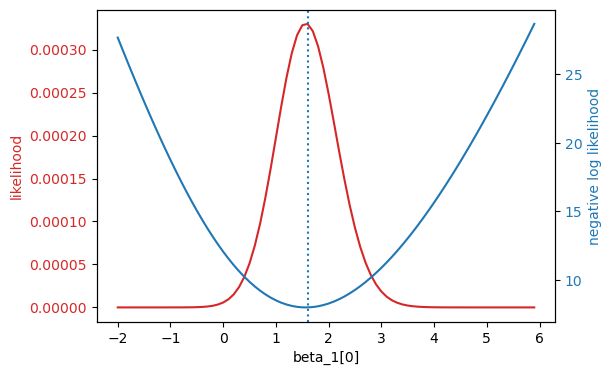

In [45]:
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax.set_xlabel('beta_1[0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()

### Print function values for the best beta_1 value 
Using the beta_1 value that minimized the loss function the most, print the value of the maximum likelihood and the minimum negative log likelihood for that beta_1 value

In [46]:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

Maximum likelihood = 0.000330, at beta_1=1.600
Minimum negative log likelihood = 8.016513, at beta_1=1.600


### Plot the best model 
Plot the model with the beta_1 value that resulted in the smallest negative log likelihood function output

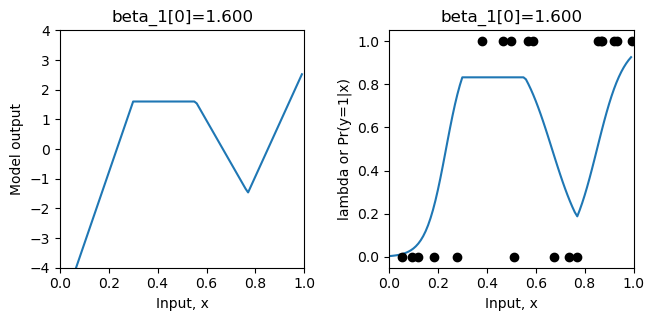

In [47]:
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))